# Busqueda informada - A*

### Estudiante: Rebeca Justiniano Saravia

Para un mapa con ciudades conectadas:

In [9]:
import math
import heapq
import matplotlib.pyplot as plt

In [10]:
# Ejemplo de datos para un mapa de 5 ciudades
ciudades_coordenadas = {
    'A': (0, 0),
    'B': (4, 3),
    'C': (1, 6),
    'D': (7, 1),
    'E': (8, 5)  # El objetivo final
}

# Representación de las conexiones y sus costes (distancia en carretera/coste)
conexiones = {
    'A': [('B', 5), ('C', 7)],
    'B': [('A', 5), ('D', 4), ('E', 12)],
    'C': [('A', 7), ('D', 6)],
    'D': [('B', 4), ('C', 6), ('E', 9)],
    'E': [('B', 12), ('D', 9)]
}

INICIO = 'A'
OBJETIVO = 'E'

## 1. Implementar A*

In [11]:
class Nodo:
    """Clase para representar un nodo en el camino (una ciudad)."""
    def __init__(self, nombre, g, h, padre=None):
        self.nombre = nombre
        self.g = g  # Coste real desde el inicio (g(n))
        self.h = h  # Coste estimado hasta el objetivo (h(n))
        self.f = g + h # Coste total estimado (f(n))
        self.padre = padre

    # Permite comparar Nodos en la cola de prioridad (heapq)
    def __lt__(self, otro):
        return self.f < otro.f

def a_estrella(inicio, objetivo, conexiones, coordenadas, funcion_h):
    """Implementación del algoritmo A*."""
    
    # 1. Inicializar estructuras
    abierta = [] # Lista abierta (Cola de Prioridad)
    g_scores = {inicio: 0} # {nombre_ciudad: coste_g}
    padres = {inicio: None} # Para reconstruir el camino
    
    h_inicio = funcion_h(inicio, objetivo, coordenadas)
    nodo_inicio = Nodo(inicio, 0, h_inicio)
    heapq.heappush(abierta, nodo_inicio)

    nodos_expandidos = 0 # Contador para la Tarea 3
    
    # 2. Bucle principal
    while abierta:
        nodo_actual = heapq.heappop(abierta)
        nodos_expandidos += 1

        # 3. Condición de meta
        if nodo_actual.nombre == objetivo:
            # Reconstruir camino
            camino = []
            actual = nodo_actual
            while actual:
                camino.append(actual.nombre)
                actual = actual.padre
            return camino[::-1], nodo_actual.g, nodos_expandidos # (camino, coste, nodos_expandidos)

        # 4. Explorar vecinos
        for vecino, coste_arista in conexiones.get(nodo_actual.nombre, []):
            nuevo_g = nodo_actual.g + coste_arista
            
            # Si el nuevo camino al vecino es mejor (menor coste g)
            if vecino not in g_scores or nuevo_g < g_scores[vecino]:
                
                # Actualizar valores
                g_scores[vecino] = nuevo_g
                h_vecino = funcion_h(vecino, objetivo, coordenadas)
                padres[vecino] = nodo_actual # Recordar el padre para la reconstrucción
                
                # Crear nuevo nodo y añadir/actualizar en la cola
                nodo_vecino = Nodo(vecino, nuevo_g, h_vecino, nodo_actual)
                heapq.heappush(abierta, nodo_vecino)
                
    return None, 0, nodos_expandidos # No se encontró camino

## 2. Definir dos heurísticas distintas (ej: distancia euclidianda y Manhattan)

In [12]:

def h_euclidiana(nodo, objetivo, coordenadas):
    """Heurística 1: Distancia Euclidiana (L2)."""
    (x1, y1) = coordenadas[nodo]
    (x2, y2) = coordenadas[objetivo]
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def h_manhattan(nodo, objetivo, coordenadas):
    """Heurística 2: Distancia Manhattan (L1)."""
    (x1, y1) = coordenadas[nodo]
    (x2, y2) = coordenadas[objetivo]
    return abs(x1 - x2) + abs(y1 - y2)

## 3. Comparar eficiencia entre heurísticas

In [13]:
print("--- Comparación de Heurísticas (A*): ---")

# Ejecución con Heurística Euclidiana 
camino_E, coste_E, expandidos_E = a_estrella(
    INICIO, OBJETIVO, conexiones, ciudades_coordenadas, h_euclidiana
)

print("\nHeurística: Euclidiana")
print(f"Camino Óptimo: {camino_E}")
print(f"Coste Total (g(E)): {coste_E}")
print(f"Nodos Expandidos: {expandidos_E}")


# Ejecución con Heurística Manhattan 
camino_M, coste_M, expandidos_M = a_estrella(
    INICIO, OBJETIVO, conexiones, ciudades_coordenadas, h_manhattan
)

print("\nHeurística: Manhattan")
print(f"Camino Óptimo: {camino_M}")
print(f"Coste Total (g(E)): {coste_M}")
print(f"Nodos Expandidos: {expandidos_M}")

# Comparación de Eficiencia 
print("\n--- Resultados de Eficiencia ---")
if expandidos_E < expandidos_M:
    print("La heurística Euclidiana fue más eficiente (menos nodos expandidos).")
elif expandidos_M < expandidos_E:
    print("La heurística Manhattan fue más eficiente (menos nodos expandidos).")
else:
    print("Ambas heurísticas expandieron el mismo número de nodos.")

--- Comparación de Heurísticas (A*): ---

Heurística: Euclidiana
Camino Óptimo: ['A', 'B', 'E']
Coste Total (g(E)): 17
Nodos Expandidos: 5

Heurística: Manhattan
Camino Óptimo: ['A', 'B', 'E']
Coste Total (g(E)): 17
Nodos Expandidos: 5

--- Resultados de Eficiencia ---
Ambas heurísticas expandieron el mismo número de nodos.


## 4. Visualizar la ruta óptima en un gráfico 


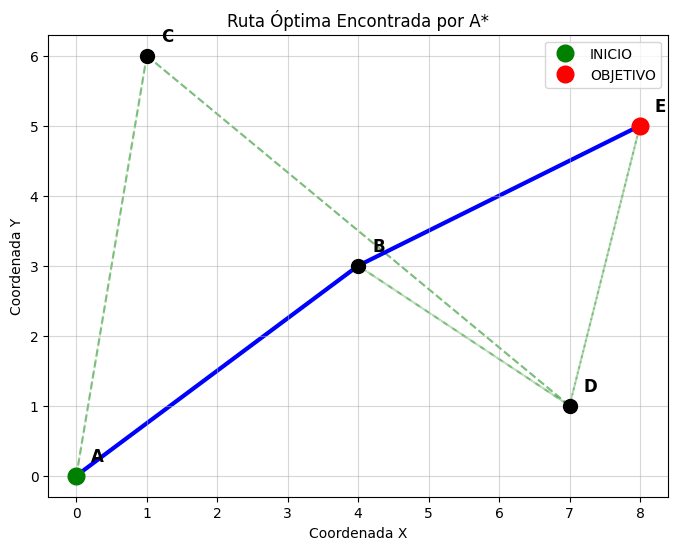

In [14]:
def visualizar_ruta(coordenadas, conexiones, camino_optimo):
    """Visualiza el mapa de ciudades y la ruta óptima."""
    
    plt.figure(figsize=(8, 6))

    # Dibujar todas las conexiones (el mapa completo)
    for ciudad, vecinos in conexiones.items():
        (x1, y1) = coordenadas[ciudad]
        for vecino, coste in vecinos:
            (x2, y2) = coordenadas[vecino]
            # Dibujar la carretera (gris claro)
            plt.plot([x1, x2], [y1, y2], 'g--', alpha=0.3, zorder=0)

    # Dibujar la ruta óptima
    if camino_optimo and len(camino_optimo) > 1:
        ruta_x = []
        ruta_y = []
        for i in range(len(camino_optimo)):
            ciudad_actual = camino_optimo[i]
            ruta_x.append(coordenadas[ciudad_actual][0])
            ruta_y.append(coordenadas[ciudad_actual][1])
            
            if i > 0:
                # Resaltar la conexión de la ruta
                plt.plot(ruta_x[-2:], ruta_y[-2:], 'b-', linewidth=3, zorder=1)

    # Dibujar las ciudades y etiquetas
    for ciudad, (x, y) in coordenadas.items():
        plt.plot(x, y, 'o', color='black', markersize=10, zorder=2)
        plt.text(x + 0.2, y + 0.2, ciudad, fontsize=12, weight='bold')

    # Marcar inicio y fin
    plt.plot(coordenadas[INICIO][0], coordenadas[INICIO][1], 'o', color='green', markersize=12, label='INICIO')
    plt.plot(coordenadas[OBJETIVO][0], coordenadas[OBJETIVO][1], 'o', color='red', markersize=12, label='OBJETIVO')

    plt.title('Ruta Óptima Encontrada por A*')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.grid(True, alpha=0.5)
    plt.legend()
    plt.show()

# Ejecutar visualización con la mejor ruta (por ejemplo, la Euclidiana)
visualizar_ruta(ciudades_coordenadas, conexiones, camino_E)